In [1]:
import numpy as np

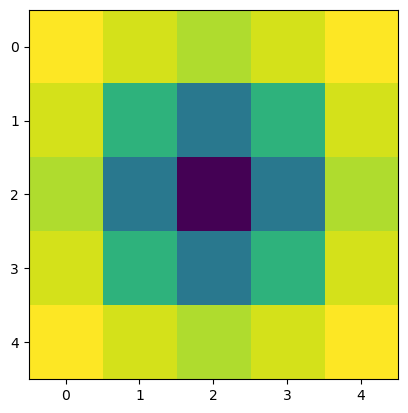

In [21]:
import numpy as np
import matplotlib.pyplot as plt
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

a=gkern(l=5,sig=20)
b=gkern(l=5,sig=1)
plt.imshow(a-b)

In [30]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

# this function reads a single frame from a file
def read_frame(video_file,w,h):
	num_bytes = int(w*h)
	yuv_file = open(video_file,'rb')
	frame_shape = (h,w)
	bytes = yuv_file.read(num_bytes)
	frame = np.frombuffer(bytes,np.uint8)
	frame = frame.reshape(frame_shape)
	return frame

def normalize(luminance,N,blur=None):
	if blur != None:
		luminance = cv2.GaussianBlur(luminance,(7,7),sigmaX=blur,sigmaY=blur)

	# get the NxN blocks
	h,w = luminance.shape[0],luminance.shape[1]

	normalized = luminance.copy().astype(float)
	m = np.max(luminance)
	for row_i,row in enumerate(tqdm(range(h))):
		for col_i,col in enumerate(range(w)):
			block = np.zeros((N,N)).astype(float)
			# get the blocks and normalize the center pixel
			patch_tlx = col - N//2 if col - N//2 > 0 else 0
			patch_tly = row - N//2 if row - N//2 > 0 else 0
			patch_brx = col + N//2 if col + N//2 < w else w
			patch_bry = row + N//2 if row + N//2 < h else h

			block_tlx = N - (patch_brx-patch_tlx)
			block_tly = N - (patch_bry-patch_tly)
			block_brx = N
			block_bry = N

			# print(block_tlx,block_tly,block_brx,block_bry)
			block[block_tly:block_bry,block_tlx:block_brx] = luminance[patch_tly:patch_bry,patch_tlx:patch_brx]

			normalized[row,col] = (luminance[row,col]-block.mean())/(block.std()+1e-3)
	return luminance,normalized

def histogram(img,num_bins):
	min = np.min(img)
	max = np.max(img)
	bin_marks = np.linspace(min,max,num_bins+1)
	bin_lowers = bin_marks[:-1]
	bin_uppers = bin_marks[1:]
	bin_centers = (bin_lowers+bin_uppers)/2
	counts = np.zeros(num_bins)

	i = 0
	for bin_l,bin_u in zip(bin_lowers,bin_uppers):
		in_bin = (img > bin_l) * (img <= bin_u)
		counts[i] = np.sum(in_bin)
		i += 1
	
	counts /= np.max(counts)
	return bin_marks,bin_centers,counts

In [8]:
# read frame, do divisive normalization
frame = read_frame("Jockey_1920x1080_120fps_420_8bit_YUV.yuv",1920,1080)

luminance,normalized = normalize(frame,8,blur=None)

# plot histogram with 255 bins
# vals = normalized.flatten()
# counts, bins, patches = plt.hist(vals, 201,density=True)
# plt.show()
# cv2.imwrite("luminance_"+str(sigma)+".png",luminance)
# cv2.imwrite("normalized_"+str(sigma)+".png",normalized)


100%|██████████| 1080/1080 [01:00<00:00, 17.82it/s]


In [37]:
cv2.imwrite("n.png",normalized*255)

True

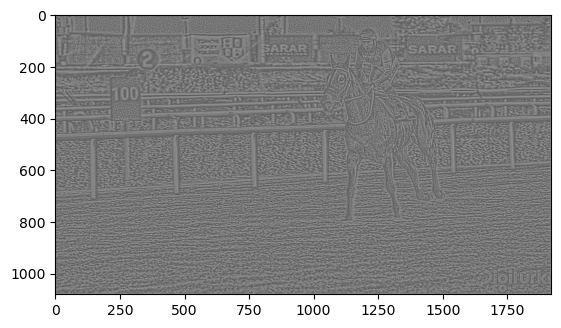

In [38]:
plt.imshow(normalized,cmap='gray')
plt.savefig("n.png")

In [1]:
vals = normalized.flatten()
counts, bins, patches = plt.hist(vals, 201,density=True)
plt.show()

NameError: name 'normalized' is not defined

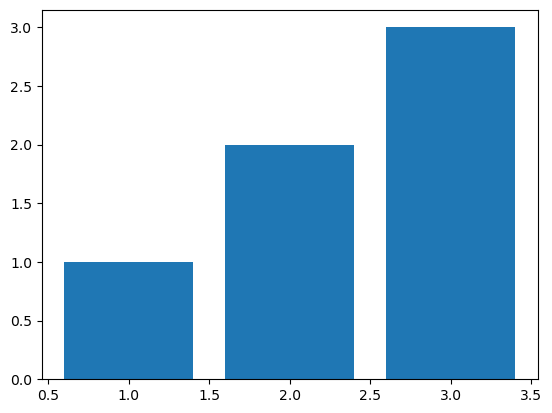

<Figure size 640x480 with 0 Axes>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.bar([1,2,3],[1,2,3])
plt.show()
plt.savefig("fig.png")

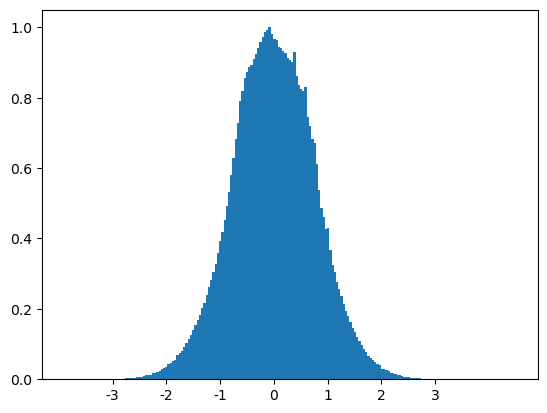

In [31]:
edges,centers,counts = histogram(normalized,201)
# center_l = [round(cent,2) for cent in centers]

plt.bar(centers,counts,width=0.05)
center_l = ["-3","-2","-1","0","1","2","3"]
centers = [-3,-2,-1,0,1,2,3]
plt.xticks(centers,center_l)
plt.show()